Pada studi kasus kali ini kita akan mencoba untuk men-clusterkan customer pada suatu mall. Berdasarkan 2 variabel yaitu pendapatan dan pengeluaran customer.  


# **Import Library**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Data Visualization 
import seaborn as sns  #Python library for Vidualization

#**Read Data**

In [2]:
dataset = pd.read_csv('https://raw.githubusercontent.com/HafizahIlma/data/main/Mall_Customers.csv')
dataset.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [3]:
#total rows and colums in the dataset
dataset.shape

(200, 5)

In [4]:
dataset.info() # there are no missing values as all the columns has 200 entries properly

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Missing values computation

In [5]:
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Feature selection for the model

Pada studi kasus kali ini hanya menggunakan 2 variabel, yaitu: Annual income dan Spending Score

In [6]:
#Mengambil hanya 2 fitur (Pendapatan Tahunan dan Skor Pengeluaran) dan Label tidak tersedia
X= dataset.iloc[:, [3,4]].values

In [7]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

## Membangun Model

Algoritma KMeans untuk menentukan jumlah cluster yang optimal , KMeans menggunakan Metode Elbow


In [8]:
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [9]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37265.86520484346,
 30259.65720728547,
 25095.70320999756,
 21830.041978049434,
 20736.679938924128]

# **Visualizing the ELBOW method to get the optimal value of K**

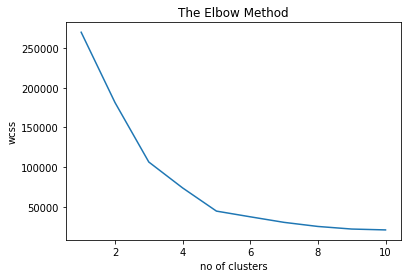

In [10]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [11]:
#If you zoom out this curve then you will see that last elbow comes at k=5
#no matter what range we select ex- (1,21) also it will see the same behaviour but if we chose higher range it is little difficult to visualize the ELBOW
#that is why we usually prefer range (1,11)
##Finally we got that k=5

#Model Build
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

#For unsupervised learning we use "fit_predict()" wherein for supervised learning we use "fit_tranform()"
#y_kmeans is the final model . Now how and where we will deploy this model in production is depends on what tool we are using.
#This use case is very common and it is used in BFS industry(credit card) and retail for customer segmenattion.

## **Visualizing all the clusters**

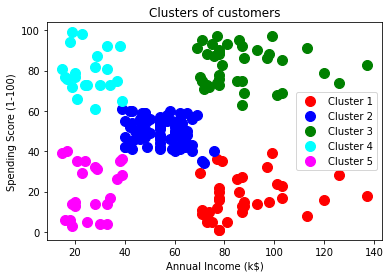

In [12]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## **Model Interpretation**

*   Cluster 1 (Red Color): Penghasilan tinggi tetapi pengeluaran lebih sedikit
*   Cluster 2 (Blue Color): Rata-rata dalam hal penghasilan dan pengeluaran
*   Cluster 3 (Green Color): Penghasilan tinggi dan juga pengeluaran tinggi [SET TARGET]
*   Cluster 4 (Cyan Color): Penghasilan lebih sedikit tetapi pengeluaran lebih banyak
*   Cluster 5 (Magenta Color): Penghasilan lebih sedikit, pengeluaran lebih sedikit

Insight: dapat menempatkan Cluster 3 ke dalam beberapa sistem peringatan di mana email dapat dikirim kepada mereka setiap hari karena ini mudah untuk berkomunikasi. Sedangkan yang lain bisa kita atur seperti seminggu sekali atau sebulan sekali.